In [3]:
#import tensorflow as tf
#from tensorflow import keras
#from tensorflow.keras import layers
#from tensorflow.keras.layers import Dense,Flatten
#from tensorflow.keras.models import Sequential
#from tensorflow.keras.optimizers import Adam
#from tensorflow.keras.preprocessing import image
#from tensorflow.keras.applications.resnet50 import preprocess_input
import numpy as np
import matplotlib.pyplot as plt
import PIL
from PIL import Image
import os
import zipfile
import pandas as pd
import cv2
import sys
from torch.utils.data import Dataset, DataLoader


ModuleNotFoundError: No module named 'matplotlib'

# Preparing The Data

In [2]:
data_path = 'NWPU VHR-10 dataset/positive image set'

extracted_files = os.listdir(data_path)

annotation_path = 'NWPU VHR-10 dataset/ground truth'


In [3]:
extracted_files

['001.jpg',
 '002.jpg',
 '003.jpg',
 '004.jpg',
 '005.jpg',
 '006.jpg',
 '007.jpg',
 '008.jpg',
 '009.jpg',
 '010.jpg',
 '011.jpg',
 '012.jpg',
 '013.jpg',
 '014.jpg',
 '015.jpg',
 '016.jpg',
 '017.jpg',
 '018.jpg',
 '019.jpg',
 '020.jpg',
 '021.jpg',
 '022.jpg',
 '023.jpg',
 '024.jpg',
 '025.jpg',
 '026.jpg',
 '027.jpg',
 '028.jpg',
 '029.jpg',
 '030.jpg',
 '031.jpg',
 '032.jpg',
 '033.jpg',
 '034.jpg',
 '035.jpg',
 '036.jpg',
 '037.jpg',
 '038.jpg',
 '039.jpg',
 '040.jpg',
 '041.jpg',
 '042.jpg',
 '043.jpg',
 '044.jpg',
 '045.jpg',
 '046.jpg',
 '047.jpg',
 '048.jpg',
 '049.jpg',
 '050.jpg',
 '051.jpg',
 '052.jpg',
 '053.jpg',
 '054.jpg',
 '055.jpg',
 '056.jpg',
 '057.jpg',
 '058.jpg',
 '059.jpg',
 '060.jpg',
 '061.jpg',
 '062.jpg',
 '063.jpg',
 '064.jpg',
 '065.jpg',
 '066.jpg',
 '067.jpg',
 '068.jpg',
 '069.jpg',
 '070.jpg',
 '071.jpg',
 '072.jpg',
 '073.jpg',
 '074.jpg',
 '075.jpg',
 '076.jpg',
 '077.jpg',
 '078.jpg',
 '079.jpg',
 '080.jpg',
 '081.jpg',
 '082.jpg',
 '083.jpg',
 '08

## Prepare Dataset and Augmentations for training

In [4]:
import sys
ROOR_DIR = "C:\\Users\\Ilyes\\Downloads\\Mask-RCNN-TF2"
sys.path.append(ROOR_DIR)
DIR = "C:\\Users\\Ilyes\\anaconda3\\envs\\project\Lib\\site-packages"
sys.path.append(DIR)
import mrcnn

In [5]:
import mrcnn
import mrcnn.utils
from keras.utils import Sequence
from mrcnn.visualize import display_top_masks
import mrcnn.visualize
from numpy import zeros
from mrcnn.config import Config

from mrcnn import model as modellib

In [6]:
dataset = 'NWPU VHR-10 dataset'
classnames = ["airplane","ship","storage tank", "baseball diamond", "tenis court", "basketball court","ground track field","harbor","bridge","vehicle"]

In [7]:
def create_df(datapath,annotation_path):
    df = pd.DataFrame(columns=['imageid','width','height','x1','y1','x2','y2','class'])
    extracted_files = os.listdir(data_path)
    for filename in extracted_files:
        boxes = list()
        classes = list()
        with open(annotation_path+'/'+filename.replace('jpg','txt'), 'r') as f:
            image = cv2.imread(data_path+'/'+filename)
            height,width,c= image.shape
            lines = f.readlines()
            for line in lines:
                # Remove parentheses and split the line into parts
                line = line.replace('(', '').replace(')', '')
                parts = line.strip().split(',')

                # Extract coordinates and object class from parts
                if len(parts) == 5:  # Assuming each line has format (x1,y1),(x2,y2),a
                    coordinates = parts[0].split() + parts[1].split() + parts[2].split() + parts[3].split()
                    xmin, ymin, xmax, ymax = map(int, coordinates)
                    object_class = int(parts[4])
                    df.loc[len(df)] = [filename.replace('.jpg',''),width,height, xmin, ymin, xmax, ymax, object_class]
    return df

In [8]:
df = create_df(data_path,annotation_path)
df.head()

,imageid,width,height,x1,y1,x2,y2,class
0,001,958,808,563,478,630,573,1
1,002,950,806,575,114,635,162,1
2,002,950,806,72,305,133,369,1
3,002,950,806,210,317,273,384,1
4,002,950,806,306,374,344,420,1


In [9]:
df[df['imageid'] == '432']

,imageid,width,height,x1,y1,x2,y2,class
2794,432,1072,710,718,293,751,346,10
2795,432,1072,710,781,271,815,332,10
2796,432,1072,710,970,235,1006,288,10


In [10]:
df.columns

Index(['imageid', 'width', 'height', 'x1', 'y1', 'x2', 'y2', 'class'], dtype='object')

In [11]:
def df_list(dataframe):
    grouped = dataframe.groupby(['imageid', 'width', 'height'])
    result = []
    for name, group in grouped:
        # Create a list for boxes and classes
        boxes_list = []
        classes_list = []
        
        # Iterate over the rows in the group
        for _, row in group.iterrows():
            # Append box coordinates to boxes_list
            boxes_list.append([row['x1'], row['y1'], row['x2'], row['y2']])
            # Append class to classes_list
            classes_list.append(row['class'])

        # Append image information and lists to result
        result.append({
            'imageid': name[0],
            'width': name[1],
            'height': name[2],
            'boxes': boxes_list,
            'classes': classes_list
        })
    return result




In [13]:
import torch
import collections
HEIGHT=1024
WIDTH=1024

In [489]:
df.

0       1
1       1
2       1
3       1
4       1
       ..
3891    7
3892    6
3893    6
3894    6
3895    6
Name: class, Length: 3896, dtype: int64

In [492]:
print(len(df))
df.groupby('class').size().reset_index(name='total_objects')

3896


,class,total_objects
0,1,757
1,2,302
2,3,655
3,4,390
4,5,524
5,6,159
6,7,163
7,8,224
8,9,124
9,10,598


In [505]:
len(df)

3896

In [503]:
train_df.groupby('class').size().reset_index(name='total_objects')

,class,total_objects
0,1,530
1,2,212
2,3,459
3,4,275
4,5,368
5,6,112
6,7,133
7,8,157
8,9,87
9,10,425


In [504]:
test_df.groupby('class').size().reset_index(name='total_objects')

,class,total_objects
0,1,86
1,2,20
2,3,65
3,4,39
4,5,63
5,6,17
6,8,27
7,9,14
8,10,42


In [508]:
def create_train_test_df(dataframe):
    train_df=pd.DataFrame(columns=dataframe.columns)
    test_df=pd.DataFrame(columns=dataframe.columns)
    
    class_desired_totals = {1: 530, 2: 208, 3: 464, 4: 275, 5: 368, 6: 111, 7: 133, 8: 157, 9: 87, 10: 425}
    for class_id, desired_total in class_desired_totals.items():
        filtered_df = df[df['class'] == class_id]
        objects_per_image = filtered_df.groupby('imageid').size().reset_index(name='total_objects')
        sorted_objects = objects_per_image.sort_values(by='total_objects', ascending=False)
        selected_images = []
        remaining_total = desired_total
        for index, row in sorted_objects.iterrows():                
            if ((remaining_total- row['total_objects']) >= 0):
                if ((train_df[train_df["imageid"]==row['imageid']]).empty == False):
                    remaining_total -= row['total_objects']
                    continue
                if (remaining_total == 7 and class_id == 10 and row['total_objects'] == 6):
                    continue
                selected_images.append({'imageid': row['imageid'], 'selected_count': row['total_objects']})
                remaining_total -= row['total_objects']
            elif (remaining_total == 7 and class_id == 10 and row['total_objects'] == 5):
                selected_images.append({'imageid': row['imageid'], 'selected_count': row['total_objects']})
                remaining_total -= row['total_objects']
            elif remaining_total == 0:
                break
        # Create DataFrames for train and test based on the selected images
        print(remaining_total)
        selected_df = pd.DataFrame(selected_images)
        train_subset = pd.merge(dataframe, selected_df['imageid'], on='imageid')
        print(len(train_subset))
        train_df = pd.concat([train_df,train_subset])

    # Add the remaining images to the test set
    test_df = dataframe[~dataframe['imageid'].isin(train_df['imageid'])]

    return train_df, test_df

In [509]:
train_df, test_df = create_train_test_df(df)

0
554
0
240
0
439
0
398
0
401
0
119
0
166
0
149
0
86
0
425


In [516]:
train_df_list = df_list(train_df)
test_df_list = df_list(test_df)

In [510]:
train_df

,imageid,width,height,x1,y1,x2,y2,class
0,011,969,742,182,251,280,347,1
1,011,969,742,286,226,378,322,1
2,011,969,742,403,178,453,222,1
3,011,969,742,635,149,731,241,1
4,011,969,742,664,245,775,344,1
...,...,...,...,...,...,...,...,...
420,453,1055,697,757,342,813,379,10
421,453,1055,697,472,196,507,233,10
422,453,1055,697,428,174,478,218,10
423,453,1055,697,151,378,195,418,10


In [511]:
test_df

,imageid,width,height,x1,y1,x2,y2,class
0,001,958,808,563,478,630,573,1
1,002,950,806,575,114,635,162,1
2,002,950,806,72,305,133,369,1
3,002,950,806,210,317,273,384,1
4,002,950,806,306,374,344,420,1
...,...,...,...,...,...,...,...,...
3813,626,811,535,450,126,654,208,9
3873,643,758,548,277,161,322,244,5
3874,643,758,548,325,164,374,247,5
3875,643,758,548,377,167,426,250,5


In [513]:
test_df.groupby('class').size().reset_index(name="Total")

,class,Total
0,1,227
1,2,79
2,3,174
3,4,46
4,5,70
5,6,33
6,7,19
7,8,67
8,9,33
9,10,171


In [215]:
filtered_df = df[df['class'] == 7]

# Group the filtered DataFrame by 'imageid' to identify unique images with objects of class 1
grouped_images = filtered_df.groupby('imageid')

train_objects = []
test_objects = []

# Initialize a counter for the number of images added to the training set
num_train_objects = 0

# Iterate over the filtered DataFrame
for index, row in filtered_df.iterrows():
    # Determine which set (training or test) to add the object to based on the counter
    if num_train_objects < 530:
        train_objects.append(row)
        num_train_objects += 1
    else:
        test_objects.append(row)

# Create DataFrames from the lists of objects for training and test
train_df = pd.DataFrame(train_objects)
test_df = pd.DataFrame(test_objects)

# Optionally, you can reset the index of the new DataFrames
train_df.reset_index(drop=True, inplace=True)
test_df.reset_index(drop=True, inplace=True)

# Print or use the train_df and test_df DataFrames
print(len(train_df))
print(len(test_df))

530
227


In [309]:
sortedobjects = filtered_df.groupby('imageid').size().reset_index(name='total_objects').sort_values(by='total_objects', ascending=False)

sortedobjects.reset_index(inplace=True)

In [311]:
sortedobjects.drop(columns="index",inplace=True)
sortedobjects

,imageid,total_objects
0,047,31
1,024,26
2,044,25
3,051,22
4,027,21
...,...,...
85,055,2
86,073,1
87,286,1
88,067,1


In [373]:
sorted_objects

,imageid,total_objects
46,047,31
23,024,26
43,044,25
50,051,22
26,027,21
...,...,...
54,055,2
72,073,1
80,286,1
66,067,1


In [418]:
train_df = pd.merge(df[df['class']==10], selected_df['imageid'], on='imageid')

# Print or use the train_df DataFrame
train_df

,imageid,width,height,x1,y1,x2,y2,class
0,397,975,623,16,68,53,134,10
1,397,975,623,33,146,77,212,10
2,397,975,623,112,155,157,221,10
3,397,975,623,204,125,257,183,10
4,397,975,623,171,249,233,291,10
...,...,...,...,...,...,...,...,...
419,453,1055,697,757,342,813,379,10
420,453,1055,697,472,196,507,233,10
421,453,1055,697,428,174,478,218,10
422,453,1055,697,151,378,195,418,10


In [372]:
filtered_df[filtered_df['imageid']=="047"]

,imageid,width,height,x1,y1,x2,y2,class
463,047,1209,731,83,84,159,144,1
464,047,1209,731,38,177,152,266,1
465,047,1209,731,41,290,159,380,1
466,047,1209,731,66,414,129,480,1
467,047,1209,731,23,486,102,543,1
468,047,1209,731,17,567,102,626,1
469,047,1209,731,344,32,419,90,1
470,047,1209,731,324,113,408,172,1
471,047,1209,731,335,195,423,255,1
472,047,1209,731,314,342,392,406,1


In [393]:
result[1]

{'imageid': '002',
 'width': 950,
 'height': 806,
 'boxes': [[575, 114, 635, 162],
  [72, 305, 133, 369],
  [210, 317, 273, 384],
  [306, 374, 344, 420],
  [447, 531, 535, 632],
  [546, 605, 625, 707],
  [632, 680, 720, 790]],
 'classes': [1, 1, 1, 1, 1, 1, 1]}

In [514]:
def rle_decode(mask_rle, shape, color=1):
    '''
    mask_rle: run-length as string formated (start length)
    shape: (height,width) of array to return 
    Returns numpy array, 1 - mask, 0 - background
    '''
    s = ' '.join(str(x) for x in mask_rle)  
    s = s.split()
    starts, lengths = [np.asarray(x, dtype=float) for x in (s[0:][::2], s[1:][::2])]
    starts -= 1
    ends = starts + lengths
    img = np.zeros(shape[0] * shape[1], dtype=np.float32)
    for lo, hi in zip(starts, ends):
        img[int(lo) : int(hi)] = color
    return img.reshape(shape)
class Compose:
    def __init__(self, transforms):
        self.transforms = transforms

    def __call__(self, image, target):
        for t in self.transforms:
            image, target = t(image, target)
        return image, target

class VerticalFlip:
    def __init__(self, prob):
        self.prob = prob

    def __call__(self, image, target):
        if random.random() < self.prob:
            height, width = image.shape[-2:]
            image = image.flip(-2)
            bbox = target["boxes"]
            bbox[:, [1, 3]] = height - bbox[:, [3, 1]]
            target["boxes"] = bbox
            if "masks" in target:
                target["masks"] = target["masks"].flip(-2)
        return image, target

class HorizontalFlip:
    def __init__(self, prob):
        self.prob = prob

    def __call__(self, image, target):
        if random.random() < self.prob:
            height, width = image.shape[-2:]
            image = image.flip(-1)
            bbox = target["boxes"]
            bbox[:, [0, 2]] = width - bbox[:, [2, 0]]
            target["boxes"] = bbox
            if "masks" in target:
                target["masks"] = target["masks"].flip(-1)
        return image, target
class ToTensor:
    def __call__(self, image, target):
        image = F.to_tensor(image)
        return image, target
    

def get_transform(train):
    transforms = [ToTensor()]    
    # Data augmentation for train
    if train: 
        transforms.append(HorizontalFlip(0.5))
        transforms.append(VerticalFlip(0.5))

    return Compose(transforms)

In [16]:
import torchvision.transforms as transforms
import random
import torch
from torchvision.transforms import functional as F
from torchvision.transforms import ToPILImage

In [139]:
class NWPUDataset(Dataset):
    def __init__(self, dataset_dir,annotation_path,dataframe,dflist,transform=None,training=True):
        self.image_ids = dataframe['imageid'].unique()
        self.dataset_dir = dataset_dir
        self.transform = transform
        self.annotation_path = annotation_path
        self.class_names = [
            "airplane", "ship", "storage tank", "baseball diamond", 
            "tennis court", "basketball court", "ground track field",
            "harbor", "bridge", "vehicle"
        ]
        self.dataframe=dataframe
        self.dflist=dflist
        self.training=training
    def __len__(self):
        return self.image_ids.shape[0]
    
    def extract_boxes(self,index):
        return [self.dflist[index]['boxes'][:], self.dflist[index]['classes'],1028,1028]
    
    
    def load_masks(self, index):
        boxes, classes,w, h = self.extract_boxes(index)
        masks = zeros([h, w, len(boxes)], dtype='uint8')
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = int(box[1]), int(box[3])
            col_s, col_e = int(box[0]),int( box[2])
            masks[row_s:row_e, col_s:col_e, i] = 1
        return masks, np.asarray(classes, dtype='int32')
    def get_masks(self, index):
        boxes, classes,w, h = self.extract_boxes(index)
        masks = zeros([h, w, len(boxes)], dtype='uint8')
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = box[1], box[3]
            col_s, col_e = box[0], box[2]
            
            masks[row_s:row_e, col_s:col_e, i] = 1
        return masks
    def get_masks(self, h,w,boxes):
        masks = zeros([h, w, len(boxes)], dtype='uint8')
        for i in range(len(boxes)):
            box = boxes[i]
            row_s, row_e = int(box[1]), int(box[3])
            col_s, col_e = int(box[0]), int(box[2])
            masks[row_s:row_e, col_s:col_e, i] = 1
        return masks
    def __getitem__(self, index):
        imageid = self.dflist[index]['imageid']
        
        image = cv2.imread(os.path.join(self.dataset_dir,
                                    imageid+'.jpg'))
        
        if self.training:
            image = cv2.resize(image, (1028, 1028))
        boxes = self.dflist[index]['boxes'][:]
        original_width = self.dflist[index]['width']
        original_height = self.dflist[index]['height']
        if self.training:
            scale_x = 1028 / original_width  # original_width is the width of the image before resizing
            scale_y = 1028 / original_height  # original_height is the height of the image before resizing
            for i in range(len(boxes)):
                box = boxes[i][:]
                box[0] *= scale_x
                box[2] *= scale_x
                box[1] *= scale_y
                box[3] *= scale_y
                boxes[i] = box
        if self.training:
            masks = np.zeros((len(boxes), 1028, 1028), dtype=np.uint8)
        else:
            masks = np.zeros((len(boxes), original_height, original_width), dtype=np.uint8)
        
        for i,x in enumerate(boxes[:]):
            x1, y1, x2, y2 = x
            row_s, row_e = int(x1), int(x2)
            col_s, col_e = int(y1), int(y2)
            masks[i, col_s:col_e , row_s:row_e] = 1   # Assign the mask to the masks array at index i
#             if self.training:
#                 a_mask = a_mask.resize((1028, 1028), resample=Image.BILINEAR)
#             a_mask = np.array(a_mask) > 0
#             masks[i,:,:] = a_mask               
      # Create target dict
        objects = self.dflist[index]['classes']
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(objects, dtype=torch.int64)
        masks = torch.as_tensor(masks, dtype=torch.uint8)
        data = {}
        data["boxes"] =  boxes
        data["labels"] = labels
        data["masks"] = masks
        
        if self.transform is not None:
            img, data = self.transform(image, data)  
        return img, data


In [515]:
class NWPUDatasetNoMask(Dataset):
    def __init__(self, dataset_dir,annotation_path,dataframe,dflist,transform=None,training=True):
        self.image_ids = dataframe['imageid'].unique()
        self.dataset_dir = dataset_dir
        self.transform = transform
        self.annotation_path = annotation_path
        self.class_names = [
            "airplane", "ship", "storage tank", "baseball diamond", 
            "tennis court", "basketball court", "ground track field",
            "harbor", "bridge", "vehicle"
        ]
        self.dataframe=dataframe
        self.dflist=dflist
        self.training=training
    def __len__(self):
        return self.image_ids.shape[0]
    
    def extract_boxes(self,index):
        return [self.dflist[index]['boxes'][:], self.dflist[index]['classes'],1028,1028]
    def __getitem__(self, index):
        imageid = self.dflist[index]['imageid']
        
        image = cv2.imread(os.path.join(self.dataset_dir,
                                    imageid+'.jpg'))
        
        if self.training:
            image = cv2.resize(image, (1028, 1028))
        boxes = self.dflist[index]['boxes'][:]
        original_width = self.dflist[index]['width']
        original_height = self.dflist[index]['height']
        if self.training:
            scale_x = 1028 / original_width  # original_width is the width of the image before resizing
            scale_y = 1028 / original_height  # original_height is the height of the image before resizing
            for i in range(len(boxes)):
                box = boxes[i][:]
                box[0] *= scale_x
                box[2] *= scale_x
                box[1] *= scale_y
                box[3] *= scale_y
                boxes[i] = box
        objects = self.dflist[index]['classes']
        boxes = torch.as_tensor(boxes, dtype=torch.float32)
        labels = torch.as_tensor(objects, dtype=torch.int64)
        data = {}
        data["boxes"] =  boxes
        data["labels"] = labels        
        if self.transform is not None:
            img, data = self.transform(image, data)  
        return img, data

In [524]:
datatrainmask = NWPUDataset(data_path,annotation_path,train_df,train_df_list,transform=get_transform(train=True))
datatrain = NWPUDatasetNoMask(data_path,annotation_path,train_df,train_df_list,transform=get_transform(train=True))
testtrainmask = NWPUDataset(data_path,annotation_path,test_df,test_df_list,transform=get_transform(train=False),training=False)
testtrain = NWPUDataset(data_path,annotation_path,test_df,test_df_list,transform=get_transform(train=False),training=False)


In [532]:
batch_size = 16
train_loader = DataLoader(datatrainmask, batch_size=batch_size, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
train_loader_no_mask = DataLoader(datatrain, batch_size=batch_size, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
test_loader = DataLoader(testtrainmask, batch_size=batch_size, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))
test_loader_no_mask = DataLoader(testtrain, batch_size=batch_size, shuffle=True, collate_fn=lambda x: tuple(zip(*x)))

In [80]:
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

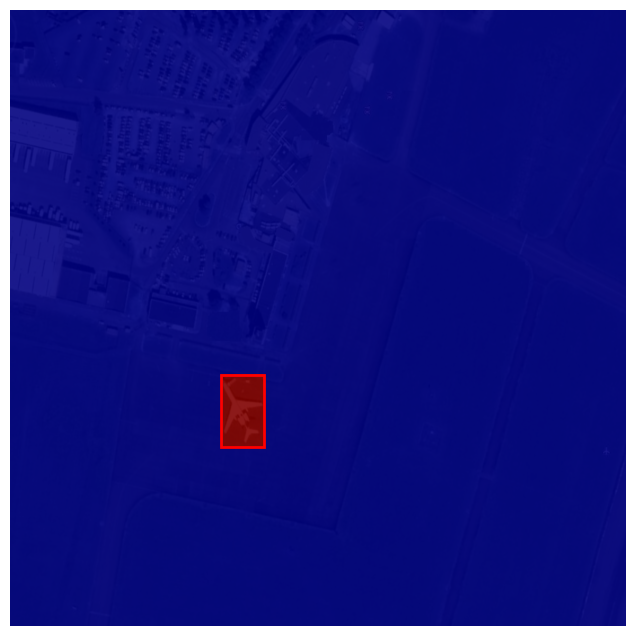

In [160]:
index = 0
img , data = custom_dataset[index]

img_np = img.permute(1, 2, 0).numpy()  # Change tensor shape to (height, width, channels) for display
image_id = custom_dataset.dflist[index]['imageid']
#masks = custom_dataset.load_masks(image_id)

plt.figure(figsize=(8, 8))
plt.imshow(img_np)
plt.axis('off')

# Plot masks and bounding boxes
for i, box in enumerate(data['boxes']):
    # Get box coordinates
    x1, y1, x2, y2 = box.numpy()
    
    # Plot bounding box
    rect = Rectangle((x1, y1), x2 - x1, y2 - y1, linewidth=2, edgecolor='r', facecolor='none')
    plt.gca().add_patch(rect)
    
    # Plot mask
    mask = data['masks'][i].numpy().astype(np.float32)
    plt.imshow(mask, alpha=0.9, cmap='jet', interpolation='none')

plt.show()

In [161]:
import torch
import torchvision
from torchvision.models.detection.faster_rcnn import FastRCNNPredictor
from torchvision.models.detection.mask_rcnn import MaskRCNNPredictor
from torchvision.models.detection import maskrcnn_resnet50_fpn
import torch.nn as nn
import torchvision.models as models
import torch.optim as optim
import time


In [177]:
def get_model():
    model = maskrcnn_resnet50_fpn(pretrained=True, box_detections_per_img = 68)
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    model.roi_heads.box_predictor = FastRCNNPredictor(
            in_features, num_classes=num_classes)
    in_features_mask = model.roi_heads.mask_predictor.conv5_mask.in_channels    
    hidden_layer = 256
    
    model.roi_heads.mask_predictor = MaskRCNNPredictor(in_features_mask, hidden_layer, num_classes)
    
    return model

In [529]:
def FRCNN():

    # load a model pre-trained pre-trained on COCO
    model = torchvision.models.detection.fasterrcnn_resnet50_fpn(pretrained=True,weights='DEFAULT', box_detections_per_img = 68)
    
    # get number of input features for the classifier
    in_features = model.roi_heads.box_predictor.cls_score.in_features
    # replace the pre-trained head with a new one
    model.roi_heads.box_predictor = FastRCNNPredictor(in_features, num_classes) 

    return model

In [ ]:
def Yolo1():
    
    

In [175]:
learning_rate=0.001
#params = [p for p in model.parameters() if p.requires_grad]
#optimizer = torch.optim.SGD(params, lr=learning_rate, momentum=0.9, weight_decay=0.005)

#lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)

In [533]:
num_anchors = 9  # Adjust according to your needs
num_classes = 11  # Example with 11 classes (background + objects)

model = get_model()
model.train();
params = [p for p in model.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=learning_rate, momentum=0.9, weight_decay=0.005)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)


# Define optimizer
#optimizer = optim.Adam(model.parameters(), lr=learning_rate)

num_epochs=2
n_batches = len(train_loader)


# Training loop
for epoch in range(1,num_epochs+1):
    print(f"Starting epoch {epoch} of {num_epochs}")
    time_start = time.time()
    loss_accum = 0.0
    loss_mask_accum = 0.0
     # Set model to training mode
    for batch_idx, (images, data) in enumerate(train_loader, 1):
        
        print(batch_idx)
        # Unpack data into separate tensors
        images = list(image for image in images)
        targets = [{k: v for k, v in t.items()} for t in data]
        # Forward pass
        loss_dict  = model(images,targets)
        loss = sum(loss for loss in loss_dict.values())
        
        optimizer.zero_grad()  # Zero out gradients
        loss.backward()
        optimizer.step()

                # Logging
        loss_mask = loss_dict['loss_mask'].item()
        loss_accum += loss.item()
        loss_mask_accum += loss_mask
        
        if batch_idx % 5 == 0:
            print(f"    [Batch {batch_idx:3d} / {n_batches:3d}] Batch train loss: {loss.item():7.3f}. Mask-only loss: {loss_mask:7.3f}")
    
        #if USE_SCHEDULER:
        #    lr_scheduler.step()

        # Train losses
        train_loss = loss_accum / n_batches
        train_loss_mask = loss_mask_accum / n_batches


        elapsed = time.time() - time_start


        torch.save(model.state_dict(), f"pytorch_model-e{epoch}.bin")
        prefix = f"[Epoch {epoch:2d} / {num_epochs:2d}]"
        print(f"{prefix} Train mask-only loss: {train_loss_mask:7.3f}")
        print(f"{prefix} Train loss: {train_loss:7.3f}. [{elapsed:.0f} secs]")

C:\Users\Ilyes\anaconda3\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\Ilyes\anaconda3\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MaskRCNN_ResNet50_FPN_Weights.COCO_V1`. You can also use `weights=MaskRCNN_ResNet50_FPN_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Starting epoch 1 of 2
1
[Epoch  1 /  2] Train mask-only loss:   0.044
[Epoch  1 /  2] Train loss:   0.182. [89 secs]
2
[Epoch  1 /  2] Train mask-only loss:   0.091
[Epoch  1 /  2] Train loss:   0.348. [181 secs]
3
[Epoch  1 /  2] Train mask-only loss:   0.135
[Epoch  1 /  2] Train loss:   0.525. [268 secs]
4
[Epoch  1 /  2] Train mask-only loss:   0.194
[Epoch  1 /  2] Train loss:   0.691. [350 secs]
5
    [Batch   5 /  26] Batch train loss:   4.858. Mask-only loss:   1.501
[Epoch  1 /  2] Train mask-only loss:   0.252
[Epoch  1 /  2] Train loss:   0.878. [444 secs]
6
[Epoch  1 /  2] Train mask-only loss:   0.298
[Epoch  1 /  2] Train loss:   1.035. [526 secs]
7
[Epoch  1 /  2] Train mask-only loss:   0.341
[Epoch  1 /  2] Train loss:   1.178. [602 secs]
8
[Epoch  1 /  2] Train mask-only loss:   0.386
[Epoch  1 /  2] Train loss:   1.315. [682 secs]
9
[Epoch  1 /  2] Train mask-only loss:   0.423
[Epoch  1 /  2] Train loss:   1.434. [761 secs]
10
    [Batch  10 /  26] Batch train loss:

In [534]:
modelfcnn = FRCNN()
modelfcnn.train();

params = [p for p in modelfcnn.parameters() if p.requires_grad]
optimizer = torch.optim.SGD(params, lr=learning_rate, momentum=0.9, weight_decay=0.005)
lr_scheduler = torch.optim.lr_scheduler.StepLR(optimizer, step_size=5, gamma=0.1)


# Define optimizer
#optimizer = optim.Adam(model.parameters(), lr=learning_rate)

num_epochs=2
n_batches = len(train_loader_no_mask)
for epoch in (1,num_epochs+1):
    i = 0    
    epoch_loss = 0
    print(f"Starting epoch {epoch} of {num_epochs}")
    time_start = time.time()
    loss_accum = 0.0
    for batch_idx, (images, data) in enumerate(train_loader_no_mask, 1):
        
        print(batch_idx)
        # Unpack data into separate tensors
        images = list(image for image in images)
        targets = [{k: v for k, v in t.items()} for t in data]
        loss_dict = model(images, targets)
        losses = sum(loss for loss in loss_dict.values())        
        optimizer.zero_grad()
        losses.backward()
        optimizer.step() 
        print(f'Loss: {losses}')
        loss_accum += loss.item()
        if batch_idx % 5 == 0:
            print(f"    [Batch {batch_idx:3d} / {n_batches:3d}] Batch train loss: {loss.item():7.3f}")
        train_loss = loss_accum / n_batches


        elapsed = time.time() - time_start


        torch.save(modelfcnn.state_dict(), f"pytorch_model-e{epoch}.bin")
        prefix = f"[Epoch {epoch:2d} / {num_epochs:2d}]"
        print(f"{prefix} Train loss: {train_loss:7.3f}. [{elapsed:.0f} secs]")
        epoch_loss += losses
    print(epoch_loss)

Starting epoch 1 of 2
1
Loss: 1.5147316455841064
[Epoch  1 /  2] Train loss:   0.053. [74 secs]
2
Loss: 1.3714174032211304
[Epoch  1 /  2] Train loss:   0.107. [146 secs]
3
Loss: 1.8862208127975464
[Epoch  1 /  2] Train loss:   0.160. [232 secs]
4
Loss: 1.7070090770721436
[Epoch  1 /  2] Train loss:   0.213. [311 secs]
5
Loss: 1.9266964197158813
    [Batch   5 /  26] Batch train loss:   1.385
[Epoch  1 /  2] Train loss:   0.266. [398 secs]
6
Loss: 1.4875985383987427
[Epoch  1 /  2] Train loss:   0.320. [474 secs]
7
Loss: 1.4001957178115845
[Epoch  1 /  2] Train loss:   0.373. [545 secs]
8
Loss: 1.8923386335372925
[Epoch  1 /  2] Train loss:   0.426. [627 secs]
9
Loss: 1.646167516708374
[Epoch  1 /  2] Train loss:   0.479. [701 secs]
10
Loss: 1.719987154006958
    [Batch  10 /  26] Batch train loss:   1.385
[Epoch  1 /  2] Train loss:   0.533. [788 secs]
11
Loss: 1.979346752166748
[Epoch  1 /  2] Train loss:   0.586. [877 secs]
12
Loss: 1.8394005298614502
[Epoch  1 /  2] Train loss:   0

## Evaluation

In [ ]:
model.eval()

# Initialize variables for AP and mAP calculation
all_predictions = []  # List to store model predictions
all_targets = []  # List to store ground truth targets

# Iterate through test data
for images, targets in test_loader:
    # Forward pass to get model predictions
    with torch.no_grad():
        predictions = model(images)

    # Convert predictions and targets to appropriate format
    # (e.g., convert bounding box coordinates, class scores, etc.)

    all_predictions.extend(predictions)
    all_targets.extend(targets)

# Compute AP and mAP
# Here you'll need to implement the logic to calculate AP and mAP based on all_predictions and all_targets

# Example code to compute AP using scikit-learn
from sklearn.metrics import average_precision_score

# Compute AP for each class
ap_scores = {}
for class_id in range(num_classes):
    class_predictions = []  # Filter predictions for a specific class
    class_targets = []  # Filter targets for a specific class

    # Compute precision and recall
    precision, recall, _ = precision_recall_curve(class_targets, class_predictions)

    # Compute AP using precision-recall curve
    ap_scores[class_id] = average_precision_score(class_targets, class_predictions)

# Compute mAP
mAP = sum(ap_scores.values()) / num_classes